[complexity]:  3471.4590493370965
[pareto set]:  [0, 9, 10, 11]


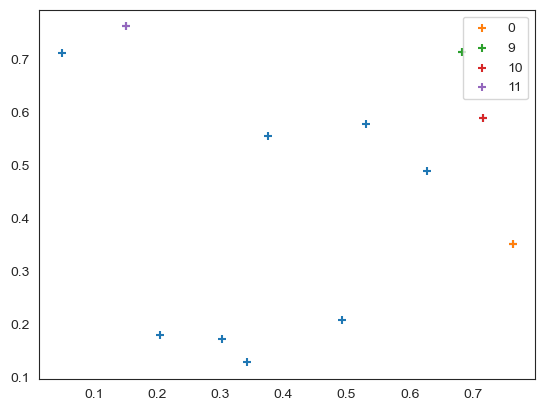

In [2]:
# coding=utf-8
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import uniform
from lib.bandits import Bernoulli, Gaussian
from lib.policies import (py_ege_sr, py_ege_sh,
                          py_ua, py_batch_ua,
                          py_batch_sr, py_batch_sh)
sns.set_style("white")
inf = 1e12
H = inf; max_H = 5e3
K = 12;  D = 2
while H>max_H:
  means = np.random.uniform(size=(K, D))
  bandit = Bernoulli(means)#
  H = bandit.H
if D==2:
    plt.scatter(*means.T, marker="+")
    for k in bandit.optimal_arms: plt.scatter(*means[k], label="%d"%k, marker="+")
    plt.legend()
print("[complexity]: ", bandit.H)
print("[pareto set]: ", bandit.optimal_arms)

In [3]:
numrep = 50 # increase for better accuracy
numtps = 15
T_max = 2*int(bandit.H/2 +1) + 1
seeds = (np.random.uniform(size=numrep)*2**31).astype(int)
T_range = np.linspace(max(100, 2*K), T_max, numtps).astype(int)
res_ = np.empty((numtps, numrep))

In [ ]:
res_ua = np.array(py_batch_ua(bandit, T_range, seeds))
res_sh = np.array(py_batch_sh(bandit, T_range, seeds))
res_sr = np.array(py_batch_sr(bandit, T_range, seeds, k=K))

In [2]:
bandit.H

44177.556687196615

In [ ]:
plt.xlabel("horizon")
plt.ylabel(r"$e_T(\nu)$")
x = T_range / H
plt.plot(x, 1-res_sr, marker="P", label="EGE-SR")
plt.plot(x, 1-res_sh, marker="*", label="EGE-SH")
plt.plot(x, 1-res_ua, marker=">", label="UA")
plt.legend()